In [137]:
### Sequential model

import keras
from keras.models import Sequential
from keras.layers import Dense

seq_model = Sequential()
seq_model.add(Dense(16, input_shape=(8,)))
seq_model.add(Dense(32, activation='relu'))
seq_model.add(Dense(16, activation='softmax'))


In [138]:
### Functional model

import keras
from keras.models import Model
from keras.layers import Input, Dense

input_layer = Input(shape=(8,))
dense_1 = Dense(32, activation='relu')(input_layer)
output_layer = Dense(16, activation='softmax')(dense_1)

func_model = Model(input_layer, output_layer)

In [ ]:
func_model.compile(optimizer="",
                   loss="",
                   metrics="")

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath="saved_model.h5",
                               verbose=0,
                               save_best_only=True)

In [ ]:
model.fit(x, y,
          batch_size=128,
          epochs=25,
          verbose=1,
          validation_data=(x_t, y_t),
          callbacks = [checkpointer])

In [ ]:
model.evaluate(x, y, verbose=0)

In [ ]:
model.predict(x)

In [ ]:
from keras.models import load_model

model = load_model('filepath.h5')

In [139]:

import keras
from keras.models import Model
from keras.layers import Input, Dense, Convolution2D, Flatten

input_layer = Input(shape=(32, 32, 3))

conv_1 = Convolution2D(128, kernel_size=2, padding='same', activation='relu')(input_layer)

conv_2 = Convolution2D(128, kernel_size=2, padding='same', activation='relu')(conv_1)

flat_1 = Flatten()(conv_2)

classes = Dense(10, activation='softmax')(flat_1)

conv_net = Model(input_layer, classes)

conv_net.summary()





Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       1664      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       65664     
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1310730   
Total params: 1,378,058
Trainable params: 1,378,058
Non-trainable params: 0
_________________________________________________________________


In [140]:
y_train = [1, 5, 4, 2]

keras.utils.to_categorical(y_train, 6)

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [141]:
true = [ 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0]
pred = [ 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1]


In [142]:
import numpy as np
np.mean(true == np.round(pred))


0.65

In [143]:
count = 0
for f in range(0, len(pred)):
    if true[f] == pred[f]:
        count = count + 1
count / len(pred)

0.65

In [144]:
true = np.array(true)
pred = np.array(pred)

In [145]:
np.argmax(pred, axis=0)

0

In [146]:
np.mean(np.equal(np.max(true, axis=-1), np.float32((np.argmax(pred, axis=-1)))))

0.0

In [147]:
np.mean(np.equal(np.argmax(true, axis=-1), np.argmax(pred, axis=-1)))

0.0

In [ ]:
K.mean(K.equal(K.max(y_true, axis=-1),
K.cast(K.argmax(y_pred, axis=-1), K.floatx())))

In [149]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [150]:
y_train, y_test

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [151]:
y_train == y_test

C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [ ]:
import keras.backend as K

def custom_metric(y_true, y_pred):
    matches = K.equal(y_true, K.round(y_pred))
    score = K.mean(matches)
    return  score

model.compile(optimizer='optimizer',
              loss='loss_function',
              metrics=['accuracy', custom_metric])

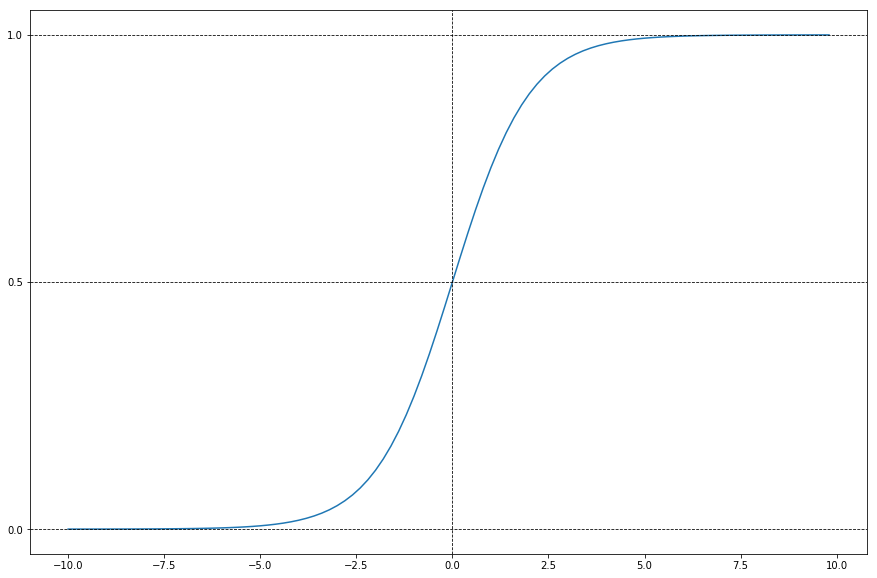

In [29]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

x = np.arange(-10., 10., 0.2)



sig = sigmoid(x)
plt.figure(figsize=(15, 10))
plt.plot(x, sig)
plt.yticks([0.0, 0.5, 1.0])

plt.axvline(x=0.0, linestyle = '--', color='black', linewidth=0.8)

plt.axhline(y=0.0, linestyle = '--', color='black', linewidth=0.8)
plt.axhline(y=0.5, linestyle = '--', color='black', linewidth=0.8)
plt.axhline(y=1.0, linestyle = '--', color='black', linewidth=0.8)


plt.show()
    

In [125]:
import keras.backend as K

#Declaring a placeholder
a = K.placeholder(shape=(1,2,3)) # Equivalent to tf.placeholder()
print(a)

vals = [0, 1, 2, 3, 4, 5]
b = K.variable(value=vals) # Equivalent to tf.Variable()
print(b)

Tensor("Placeholder_62:0", shape=(1, 2, 3), dtype=float32)
<tf.Variable 'Variable_65:0' shape=(6,) dtype=float32_ref>


In [126]:
import keras.backend as K

c = K.placeholder(shape=(1, 2))
d = K.placeholder(shape=(2, 5))

print(K.dot(c, d))

Tensor("MatMul_13:0", shape=(1, 5), dtype=float32)


In [134]:
print(K.sum(c, axis=0))
print(K.sum(c, axis=1))

Tensor("Sum_7:0", shape=(2,), dtype=float32)
Tensor("Sum_8:0", shape=(1,), dtype=float32)


In [136]:
print(K.mean(c, axis=0))

Tensor("Mean_1:0", shape=(2,), dtype=float32)


In [12]:
######### Tensorboard

import tensorflow as tf
import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D, Dropout
import keras.backend as K

batch_size = 128
n_classes = 10
n_epochs = 15

im_row, im_col = 28, 28


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, im_row, im_col)
    x_test = x_test.reshape(x_test.shape[0], 1, im_row, im_col)
    input_shape = (1, im_row, im_col)
else:
    x_train = x_train.reshape(x_train.shape[0], im_row, im_col, 1)
    x_test = x_test.reshape(x_test.shape[0], im_row, im_col, 1)
    input_shape = (im_row, im_col, 1)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_______________________________________________________

In [15]:
tensorboard = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0,  
          write_graph=True, write_images=True)

checkpoint = keras.callbacks.ModelCheckpoint(filepath="keras_MNIST_CNN.h5",
                               verbose=0,
                               save_best_only=True)

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[checkpoint, tensorboard])

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 11s - loss: 0.2347 - acc: 0.9289 - val_loss: 0.0475 - val_acc: 0.9840
Epoch 2/15
60000/60000 [==============================] - 7s - loss: 0.0819 - acc: 0.9750 - val_loss: 0.0380 - val_acc: 0.9870
Epoch 3/15
60000/60000 [==============================] - 8s - loss: 0.0640 - acc: 0.9807 - val_loss: 0.0326 - val_acc: 0.9895TA: 1s - loss: 0.0636 - acc: 0. - ETA: 1s - loss: 0.0638 - acc: 0.981 - ETA: 1s - loss: 
Epoch 4/15
60000/60000 [==============================] - 7s - loss: 0.0524 - acc: 0.9835 - val_loss: 0.0301 - val_acc: 0.9893
Epoch 5/15
60000/60000 [==============================] - 7s - loss: 0.0450 - acc: 0.9865 - val_loss: 0.0313 - val_acc: 0.9900
Epoch 6/15
60000/60000 [==============================] - 7s - loss: 0.0384 - acc: 0.9882 - val_loss: 0.0279 - val_acc: 0.9929
Epoch 7/15
60000/60000 [==============================] - 7s - loss: 0.0337 - acc: 0.9891 - val_los